<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/practice3.png' width=300/></center>

<center>본 실습에서 요구하는 내용 외에도 다양한 내용을 스스로 추가하여  탐색하고 분석해 보기를 권고합니다.</center>




# 서울시 인구 분석

<img src='https://raw.githubusercontent.com/Jangrae/img/master/people2.png' width="650" align="left">

## 1.환경 설정

- 데이터 탐색과 전처리를 하기 전 라이브러리와 파일을 읽어옵니다.
- 시각화에 한글이 포함된 경우 이에 대한 설정을 진행합니다.

**1) 한글 설정**

- Jupyter Notebook 시각화에 한글이 표시되게 설정합니다.

In [1]:
# 라이브러리 불러오기
import matplotlib 
import matplotlib.pyplot as plt

# 폰트설정
matplotlib.font_manager._rebuild()
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

**2) 라이브러리 불러오기**

- 사용할 라이브러리를 불러옵니다.

In [2]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

**3) 데이터 읽어오기**

- 다음 경로의 파일을 읽어와 pop01, pop02, pop03 데이터프레임을 만듭니다.
- 파일 경로1: 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h01.csv'    
- 파일 경로2: 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h02.csv'
- 파일 경로3: 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h03.csv'
- 단축 경로1: 'https://bit.ly/PopH01File'
- 단축 경로2: 'https://bit.ly/PopH02File'
- 단축 경로3: 'https://bit.ly/PopH03File'

In [7]:
# pop01 데이터 읽어오기
path = 'https://bit.ly/PopH01File'
pop01 = pd.read_csv(path)

# 확인
pop01.head()

,year,k_male,k_female
0,1981,4160,4191
1,1982,4160,4191
2,1983,4160,4191
3,1984,4160,4191
4,1985,4160,4191


In [8]:
# pop02 데이터 읽어오기
path = 'https://bit.ly/PopH02File'
pop02 = pd.read_csv(path)


# 확인
pop02.head()

,year,f_male,f_female
0,1985,7,6
1,1986,7,5
2,1987,6,5
3,1988,5,5
4,1989,6,5


In [9]:
# pop03 데이터 읽어오기
path = 'https://bit.ly/PopH03File'
pop03 = pd.read_csv(path)


# 확인
pop03.head()

,year,household,older_65
0,1981,1915,246
1,1982,2001,260
2,1983,2116,260
3,1984,2246,275
4,1985,2338,211


## 2. 데이터 탐색

다음과 같은 정보 확인을 통해 처리할 대상 데이터를 이해합니다.
- 상/하위 데이터 확인
- 데이터프레임 크기 확인
- 열 이름, 데이터 형식, 값 개수 등 확인
- 기초 통계정보 확인
- 결측치 확인
- 범주형 데이터 확인
- 개별 열 값 상세 확인 등

**1) 데이터프레임 크기 확인**

- 세 개의 데이터프레임 크기(행 수, 열 수)를 확인합니다.

In [13]:
# 데이터 크기 확인
print(pop01.shape)
print(pop02.shape)
print(pop03.shape)


(40, 3)
(36, 3)
(40, 3)


**2) year 최솟값, 최댓값 확인**

- 세 개의 데이터프레임 year열 최솟값, 최댓값 크기를 비교해 차이가 있는 지 각각 확인합니다.

In [18]:
# year 최댓값, 최솟값 확인
print(pop01['year'].max())
print(pop01['year'].min())
print('*'*10)
print(pop02['year'].max())
print(pop02['year'].min())
print('*'*10)
print(pop03['year'].max())
print(pop03['year'].min())

2020
1981
**********
2020
1985
**********
2020
1981


**3) 결측치 확인**

- 세 개의 데이터프레임에 결측치가 있는 지 각각 확인합니다.

In [24]:
# 결측치 확인
print(pop02.info())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   year      36 non-null     int64
 1   f_male    36 non-null     int64
 2   f_female  36 non-null     int64
dtypes: int64(3)
memory usage: 992.0 bytes
None


## 3. 데이터 전처리

전처리 과정에서 다음과 같은 처리를 할 수 있습니다.

- 결측치 처리
- 값 변경
- 열 추가
- 불필요한 열 제거
- 열 이름 변경
- 데이터 통합(연결 또는 조인)
- 가변수화 등

**1) 데이터 통합**

- concat을 사용해 연결하면 인덱스 값을 기준으로 연결되어 데이터가 어긋납니다.
- **year** 열을 기준으로 **outer** 방식으로 조인(병합)합니다.
- 외국인 정보가 1981 ~ 1984년이 누락되어 결측치가 발생할 것입니다.
- 세 개의 데이터프레임을 병합(조인)하여 pop 데이터프레임을 선언합니다.
- 이후의 모든 작업은 pop 데이터프레임을 대상으로 진행합니다.

In [26]:
# 데이터프레임 조인
pop = pd.merge(pop01, pop02, on='year', how='outer')
pop = pd.merge(pop, pop03, on='year', how='outer')


# 확인
print(pop)

    year  k_male  k_female  f_male  f_female  household  older_65
0   1981    4160      4191     NaN       NaN       1915       246
1   1982    4160      4191     NaN       NaN       2001       260
2   1983    4160      4191     NaN       NaN       2116       260
3   1984    4160      4191     NaN       NaN       2246       275
4   1985    4160      4191     7.0       6.0       2338       211
5   1986    4899      4888     7.0       5.0       2428       305
6   1987    5000      4979     6.0       5.0       2518       329
7   1988    5156      5120     5.0       5.0       2658       349
8   1989    5305      5261     6.0       5.0       2817       363
9   1990    5321      5282     5.0       4.0       2820       363
10  1991    5468      5405    18.0      14.0       3330       424
11  1992    5500      5435    19.0      16.0       3383       434
12  1993    5478      5412    19.0      17.0       3431       445
13  1994    5409      5351    21.0      19.0       3456       454
14  1995  

**2) 결측치 확인**

- 결측치가 있는지 확인합니다.

In [28]:
# 결측치 확인
pop.info()
pop.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 39
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       40 non-null     int64  
 1   k_male     40 non-null     int64  
 2   k_female   40 non-null     int64  
 3   f_male     36 non-null     float64
 4   f_female   36 non-null     float64
 5   household  40 non-null     int64  
 6   older_65   40 non-null     int64  
dtypes: float64(2), int64(5)
memory usage: 2.5 KB


year         0
k_male       0
k_female     0
f_male       4
f_female     4
household    0
older_65     0
dtype: int64

**3) 결측치 저리**

- 연도별 인구 현황이므로 임의의 값을 채우는 것이 바람직하지 않아 보입니다.
- 이후 값, 즉 1985년 값으로 채우는 것도 정확한 분석을 방해할 것 같습니다.
- 이에 결측치가 있는 1981년~1984년 행을 제거할 것입니다.

In [29]:
# 결측치 제거
pop.dropna(axis=0, inplace=True)
           
# 확인
pop.isnull().sum()

year         0
k_male       0
k_female     0
f_male       0
f_female     0
household    0
older_65     0
dtype: int64

**3) 열 추가**

- 이후 분석의 편의를 위해 다음과 같은 의미를 갖는 열을 추가하고자 합니다.
    - k_total = 전체 한국인 인구수
    - f_total = 전체 외국인 인구수
    - male = 전체 남자 인구수
    - female = 전체 여자 인구수
    - total = 전체 인구수
- 추가할 열에 대한 공식은 다음과 같습니다.
    - k_total = k_male + k_female
    - f_total = f_male + f_female
    - male = k_male + f_male
    - female = k_female + f_female
    - total = k_total + f_total
- 정리한 공식에 따라 데이터프레임에 열을 추가합니다.

In [34]:
# 열 추가
pop['k_total'] = pop['k_male'] + pop['k_female']
pop['f_total'] = pop['f_male'] + pop['f_female']
pop['male'] = pop['k_male'] + pop['f_male']
pop['female'] = pop['k_female'] + pop['f_female']
pop['total'] = pop['k_total'] + pop['f_total']

#  확인
pop.head()

,year,k_male,k_female,f_male,f_female,household,older_65,k_total,f_total,male,female,total
0,1985,4160,4191,7.0,6.0,2338,211,8351,13.0,4167.0,4197.0,8364.0
1,1986,4899,4888,7.0,5.0,2428,305,9787,12.0,4906.0,4893.0,9799.0
2,1987,5000,4979,6.0,5.0,2518,329,9979,11.0,5006.0,4984.0,9990.0
3,1988,5156,5120,5.0,5.0,2658,349,10276,10.0,5161.0,5125.0,10286.0
4,1989,5305,5261,6.0,5.0,2817,363,10566,11.0,5311.0,5266.0,10577.0


**3-1) 열 추가**

- 고령화율 추가

In [71]:
pop['older_rate(%)'] = pop['older_65'] / pop['total'] * 100

pop.head()

,year,household,total,male,female,k_total,k_male,k_female,f_total,f_male,f_female,older_65,older_rate(%)
0,1985,2338,8364.0,4167.0,4197.0,8351,4160,4191,13.0,7.0,6.0,211,2.522716
1,1986,2428,9799.0,4906.0,4893.0,9787,4899,4888,12.0,7.0,5.0,305,3.112563
2,1987,2518,9990.0,5006.0,4984.0,9979,5000,4979,11.0,6.0,5.0,329,3.293293
3,1988,2658,10286.0,5161.0,5125.0,10276,5156,5120,10.0,5.0,5.0,349,3.392961
4,1989,2817,10577.0,5311.0,5266.0,10566,5305,5261,11.0,6.0,5.0,363,3.431975


**4) (옵션) 열 순서 변경**

- 데이터 이해를 돕기 위해 다음과 같은 순서로 데이터프레임 열 순서를 변경합니다.
- year, household, total, male, female, k_total, k_male, k_female, f_total, f_male, f_female, older_65


In [72]:
# 열 순서 변경
pop = pop[['year', 'household', 'total', 'male', 'female', 'k_total', 'k_male', 'k_female', 'f_total', 'f_male', 'f_female',
           'older_65', 'older_rate(%)']]


# 확인
pop.head()

,year,household,total,male,female,k_total,k_male,k_female,f_total,f_male,f_female,older_65,older_rate(%)
0,1985,2338,8364.0,4167.0,4197.0,8351,4160,4191,13.0,7.0,6.0,211,2.522716
1,1986,2428,9799.0,4906.0,4893.0,9787,4899,4888,12.0,7.0,5.0,305,3.112563
2,1987,2518,9990.0,5006.0,4984.0,9979,5000,4979,11.0,6.0,5.0,329,3.293293
3,1988,2658,10286.0,5161.0,5125.0,10276,5156,5120,10.0,5.0,5.0,349,3.392961
4,1989,2817,10577.0,5311.0,5266.0,10566,5305,5261,11.0,6.0,5.0,363,3.431975


**5) (옵션) 인덱스 초기화**

- 인덱스가 0부터 시작하는 일련 변호를 갖지 않는다면 인덱스를 초기화합니다.

In [77]:
# 인덱스 초기화
pop.reset_index(drop=True, inplace=True)

# 확인
pop.head()

,year,household,total,male,female,k_total,k_male,k_female,f_total,f_male,f_female,older_65,older_rate(%)
0,1985,2338,8364.0,4167.0,4197.0,8351,4160,4191,13.0,7.0,6.0,211,2.522716
1,1986,2428,9799.0,4906.0,4893.0,9787,4899,4888,12.0,7.0,5.0,305,3.112563
2,1987,2518,9990.0,5006.0,4984.0,9979,5000,4979,11.0,6.0,5.0,329,3.293293
3,1988,2658,10286.0,5161.0,5125.0,10276,5156,5120,10.0,5.0,5.0,349,3.392961
4,1989,2817,10577.0,5311.0,5266.0,10566,5305,5261,11.0,6.0,5.0,363,3.431975


## 4. 데이터 분석

- 데이터를 집계하고 간단히 시각화하여 분석합니다.
- 연속형 값은 선 그래프, 범주형 값은 막대 그래프로 시각화함이 일반적입니다.

**1) 전체 인구 변화**

- 전체 인구 변화를 선 그래프로 시각화해 확인합니다.

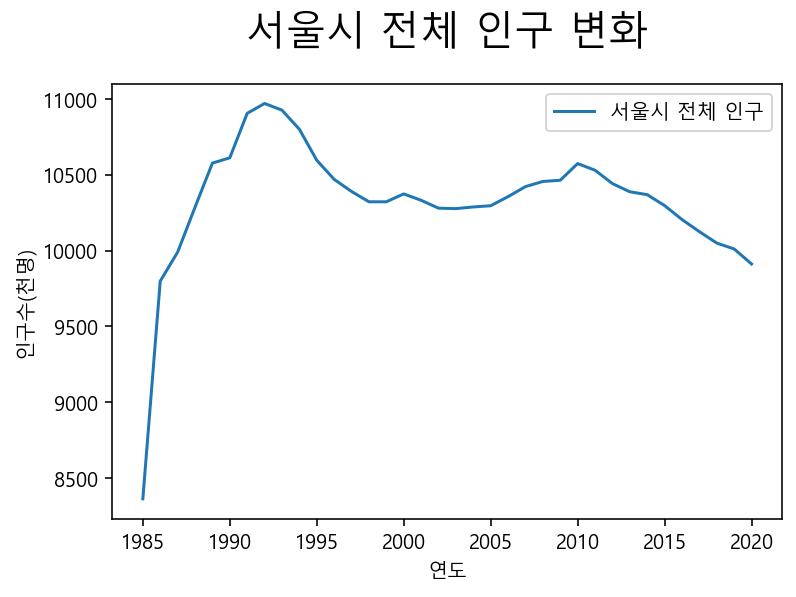

In [81]:
# 전체 인구 변화
plt.plot(pop['year'], pop['total'])
plt.legend(['서울시 전체 인구'])
plt.title('서울시 전체 인구 변화', fontsize=20, pad=20)
plt.xlabel('연도')
plt.ylabel('인구수(천명)')
plt.show()


**2) 남녀 인구 변화**

- 전체 남녀 인구 변화를 선 그래프로 시각화해 확인합니다.


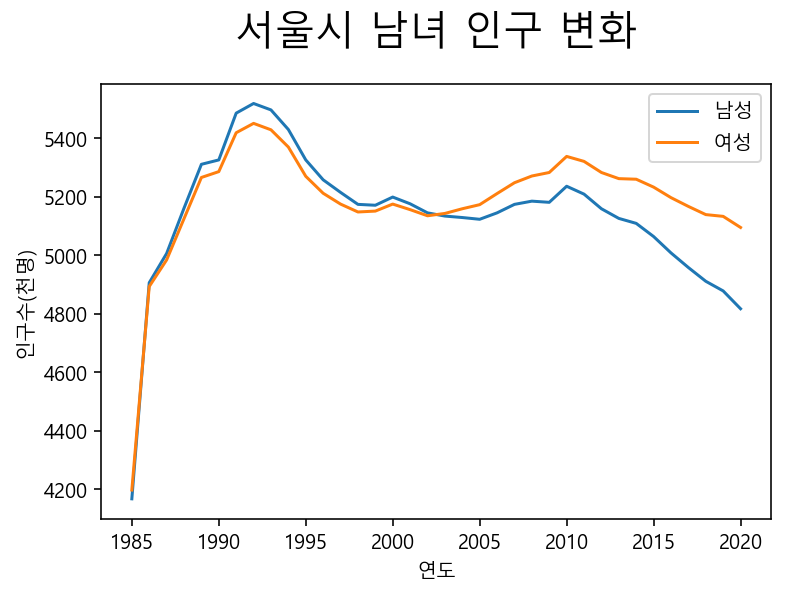

In [83]:
# 남녀 인구 변화
plt.plot(pop['year'], pop['male'])
plt.plot(pop['year'], pop['female'])
plt.legend(['남성', '여성'])
plt.title('서울시 남녀 인구 변화', fontsize=20, pad=20)
plt.xlabel('연도')
plt.ylabel('인구수(천명)')
plt.show()



**3) 한국인 인구 변화**

- 한국인 인구 변화를 선 그래프로 시각화해 확인합니다.

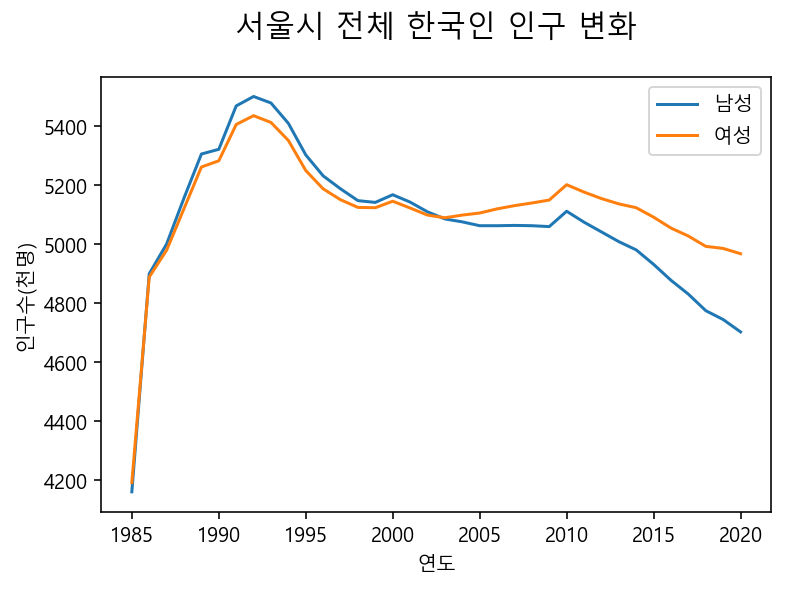

In [86]:
# 한국인 남녀 인구 변화
plt.plot(pop['year'], pop[['k_male', 'k_female']])
plt.legend(['남성', '여성'])
plt.title('서울시 전체 한국인 인구 변화', fontsize=15, pad=20)
plt.xlabel('연도')
plt.ylabel('인구수(천명)')
plt.show()


**4) (옵션) 외국인 인구 변화**

- 외국인 인구 변화를 선 그래프로 시각화해 확인합니다.

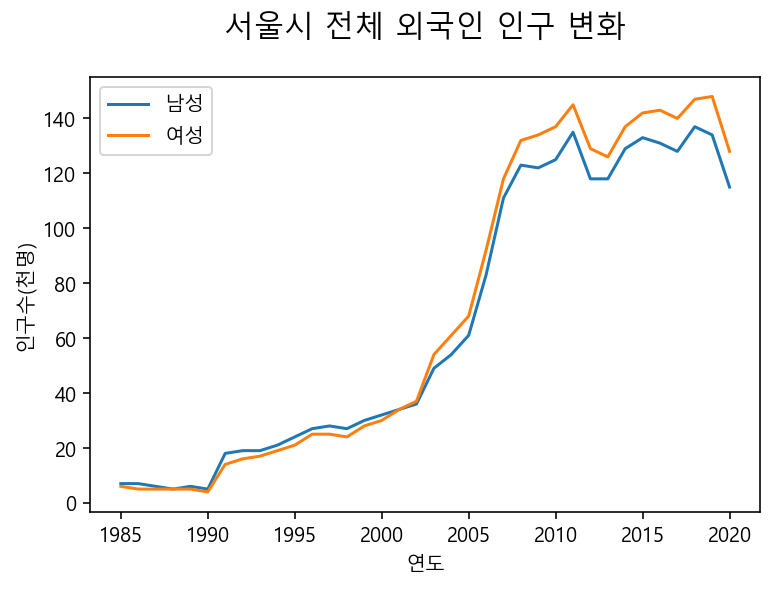

In [87]:
# 외국인 남녀 인구 변화
plt.plot(pop['year'], pop[['f_male', 'f_female']])
plt.legend(['남성', '여성'])
plt.title('서울시 전체 외국인 인구 변화', fontsize=15, pad=20)
plt.xlabel('연도')
plt.ylabel('인구수(천명)')
plt.show()


**5) (옵션) 가구수 변화**

- 가구수 변화를 선 그래프로 시각화해 확인합니다.

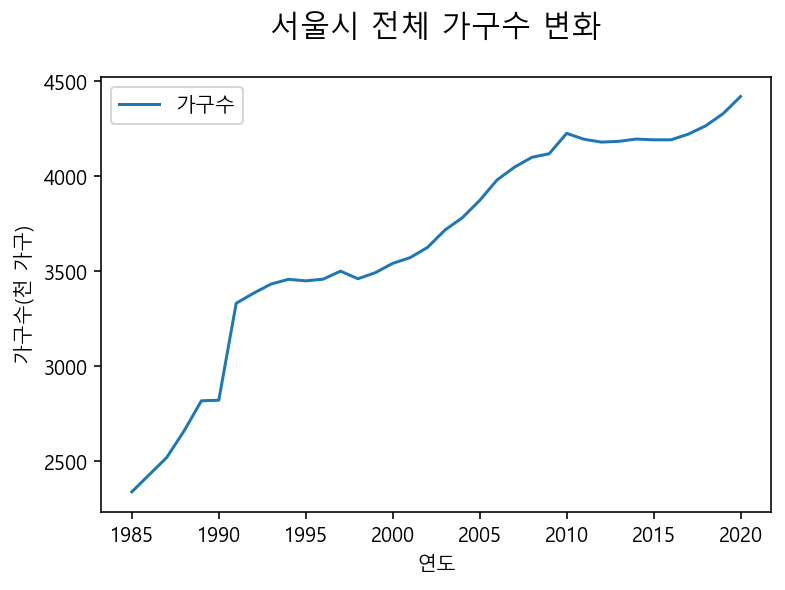

In [91]:
# 가구수 변화
plt.plot(pop['year'], pop['household'])
plt.legend(['가구수'])
plt.title('서울시 전체 가구수 변화', fontsize=15, pad=20)
plt.xlabel('연도')
plt.ylabel('가구수(천 가구)')
plt.show()



**6) (옵션) 노령인구 변화**

- 노령인구 변화를 선 그래프로 시각화해 확인합니다.

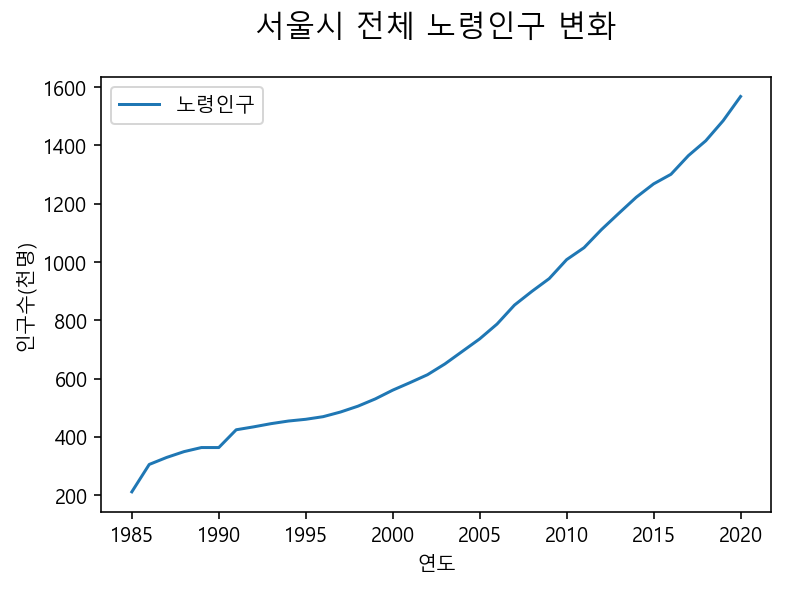

In [92]:
# 65세 이상 변화
plt.plot(pop['year'], pop['older_65'])
plt.legend(['노령인구'])
plt.title('서울시 전체 노령인구 변화', fontsize=15, pad=20)
plt.xlabel('연도')
plt.ylabel('인구수(천명)')
plt.show()



**7) (추가) 전체 인구 대비 전체 남녀 인구 변화**

- 선 그래프로 시각화해 확인합니다.

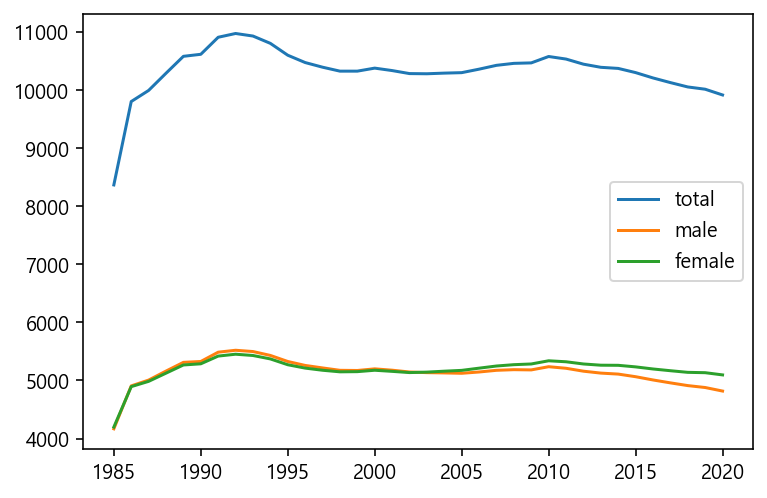

In [95]:
plt.plot(pop['year'], pop[['total', 'male', 'female']])
plt.legend(['total', 'male', 'female'])

plt.show()

**8) (추가) 고령화율 변화**

- 선 그래프로 시각화해 확인합니다.

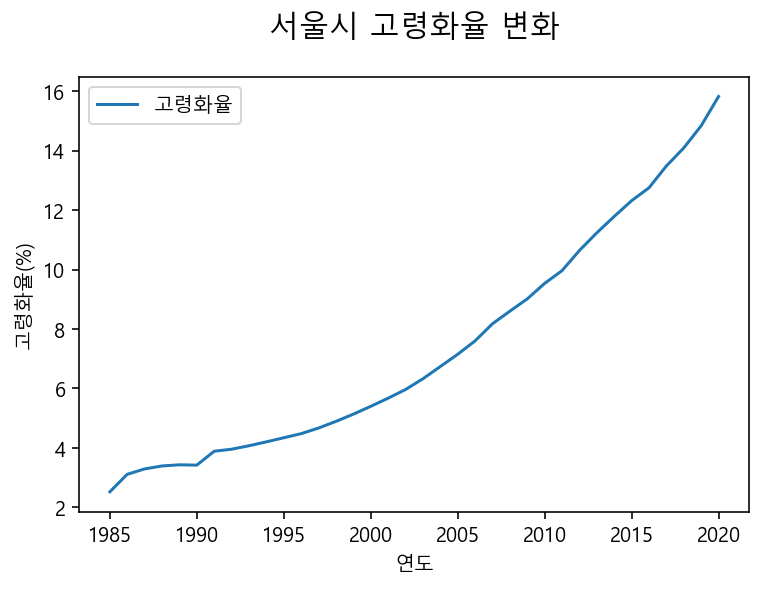

In [94]:
plt.plot(pop['year'], pop['older_rate(%)'])
plt.legend(['고령화율'])
plt.title('서울시 고령화율 변화', fontsize=15, pad=20)
plt.xlabel('연도')
plt.ylabel('고령화율(%)')
plt.show()


## 5.정리

- 분석을 통해 확인한 내용을 정리합니다.

**1) 의견**

- 서울시 인구는 1990년대 초반 이후 우하향 곡선을 그리며, 2020년 1000만명 밑으로 떨어졌다.
        ## 서울시 인구가 줄어드는 것과 주변 위성도시의 인구 수를 조사해본다.
- 전체 인구 중 남자의 인구 감소세가 여자보다 높다.
        ## 서울시의 여성 대책에 대해서 조사한다.
- 외국인 인구 수는 2010년대 이후로 증가세가 꺾였다.
        ## 외국인 인구 수의 증가세가 줄어든 이유를 조사한다.
- 전체 인구 수는 줄어들지만 전체 가구 수가 꾸준히 증가하는 것을 보아 핵가족화가 진행되고, 1인 가구가 늘고 있을 것으로 예상된다.
        ## 전체 가구 수 중 1인 가구의 수를 조사해본다.
- 노령 인구 수가 급격히 늘고 있다.
        ## 노령 인구의 1인 가구 수를 조사해서 노령화 대책을 세운다.

**2) 기타**

- 처음 해보는 미니 프로젝트였지만 팀원들의 도움으로 잘 해낼 수 있었습니다.
- 서울시의 인구가 1000만명 밑으로 떨어졌다는 것을 오늘 알았습니다.